# Zepto Free Cash Disablement Analysis

## 📌 Project Summary
This project investigates patterns behind the disablement of "free cash" rewards for Zepto users using a simulated dataset of 827 users. The goal is to uncover potential fraud signals and behavioral patterns that lead to disablement.

## 🧠 Objective
Analyze user features such as:
- Number of device accounts
- Wallet top-up amount
- Login hour
- Total number of orders

To determine how they correlate with free cash disablement.

## 🗂️ Dataset Details
- Total Users: 827
- Target: `free_cash_disabled` (Yes/No)
- Features:
  - `device_accounts`: Number of linked devices (1 to 5)
  - `wallet_topup_amt`: Amount topped up (0, 10, 50, 100)
  - `login_hour`: Hour of login (0 to 23)
  - `total_orders`: Number of orders (0 to 9)

## 🔍 Analysis Objectives
1. Explore correlation between features and disablement rate
2. Identify suspicious patterns (e.g., multi-device usage, login time)
3. Provide actionable business insights and next steps

## ⚠️ Note
- The data is simulated and not based on real Zepto users.
- Insights are for illustrative purposes; real-world validation is necessary.


# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [ ]:
df = pd.read_csv("D:\\Projects\\zepto\\zepto_free_cash_analysis.csv")

# Basic info

In [ ]:
df.head()

,user_id,account_age_days,total_orders,device_accounts,wallet_topup_amt,login_hour,free_cash_shown,free_cash_used,disabled_flag
0,U0001,103,5,2,100,11,Yes,No,No
1,U0002,349,3,2,0,15,Yes,Yes,Yes
2,U0003,271,4,1,0,22,Yes,No,Yes
3,U0004,107,2,1,10,7,Yes,No,No
4,U0005,72,3,4,50,8,Yes,No,Yes


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           827 non-null    object
 1   account_age_days  827 non-null    int64 
 2   total_orders      827 non-null    int64 
 3   device_accounts   827 non-null    int64 
 4   wallet_topup_amt  827 non-null    int64 
 5   login_hour        827 non-null    int64 
 6   free_cash_shown   827 non-null    object
 7   free_cash_used    827 non-null    object
 8   disabled_flag     827 non-null    object
dtypes: int64(5), object(4)
memory usage: 58.3+ KB
None
       account_age_days  total_orders  device_accounts  wallet_topup_amt  \
count        827.000000    827.000000       827.000000        827.000000   
mean         184.360339      2.498186         1.914148         20.749698   
std          101.838800      1.627825         1.076327         30.383648   
min            1.000000      0

# Satistical summary

In [32]:
print(df.describe())

       account_age_days  total_orders  device_accounts  wallet_topup_amt  \
count        827.000000    827.000000       827.000000        827.000000   
mean         184.360339      2.498186         1.914148         20.749698   
std          101.838800      1.627825         1.076327         30.383648   
min            1.000000      0.000000         1.000000          0.000000   
25%          100.000000      1.000000         1.000000          0.000000   
50%          184.000000      2.000000         2.000000          0.000000   
75%          268.000000      3.000000         2.500000         50.000000   
max          364.000000      9.000000         5.000000        100.000000   

       login_hour  
count  827.000000  
mean    11.446191  
std      6.938885  
min      0.000000  
25%      5.000000  
50%     11.000000  
75%     17.000000  
max     23.000000  


# Finding duplicates

In [35]:
df[df.duplicated()]

,user_id,account_age_days,total_orders,device_accounts,wallet_topup_amt,login_hour,free_cash_shown,free_cash_used,disabled_flag,order_range


In [36]:
df.duplicated().sum()

np.int64(0)

# Identifying Null Values

In [37]:
df.isnull().sum()

user_id             0
account_age_days    0
total_orders        0
device_accounts     0
wallet_topup_amt    0
login_hour          0
free_cash_shown     0
free_cash_used      0
disabled_flag       0
order_range         0
dtype: int64

# Count of users with free cash disabled

In [ ]:
disabled_counts = df['disabled_flag'].value_counts()
disabled_counts

disabled_flag
Yes    461
No     366
Name: count, dtype: int64

# Plot count of disabled vs not disabled

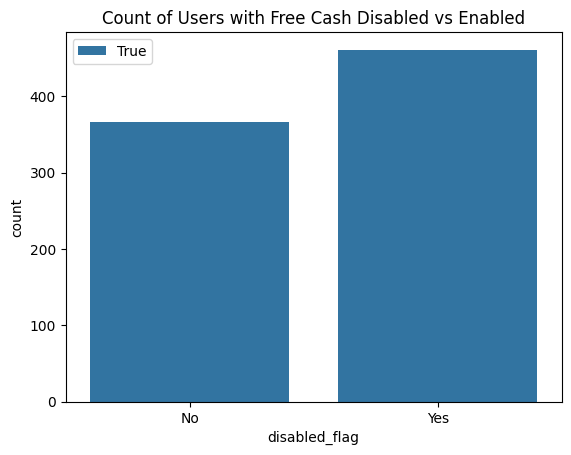

In [ ]:
sns.countplot(data=df, x='disabled_flag',hue=True)
plt.title('Count of Users with Free Cash Disabled vs Enabled')
plt.show()

#  To get with percentage

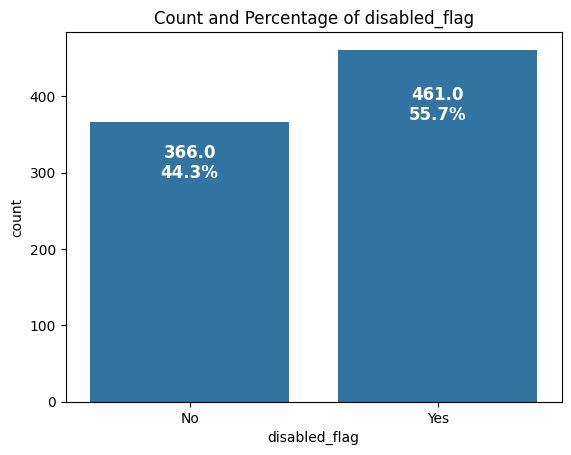

In [16]:
ax = sns.countplot(x='disabled_flag', data=df)

total = len(df)

for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y - (y*0.2), f'{count}\n{percentage:.1f}%', ha='center', color='white', fontsize=12, fontweight='bold')

plt.title(f'Count and Percentage of {'disabled_flag'}')
plt.show()

# Explore relation between device_accounts and disabled_flag

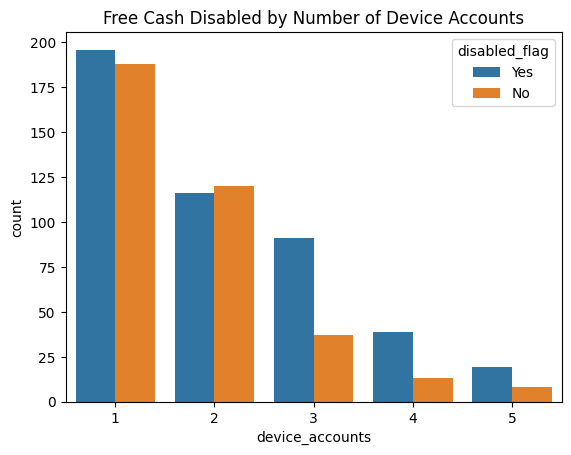

In [ ]:
sns.countplot(data=df, x='device_accounts', hue='disabled_flag')
plt.title('Free Cash Disabled by Number of Device Accounts')
plt.show()

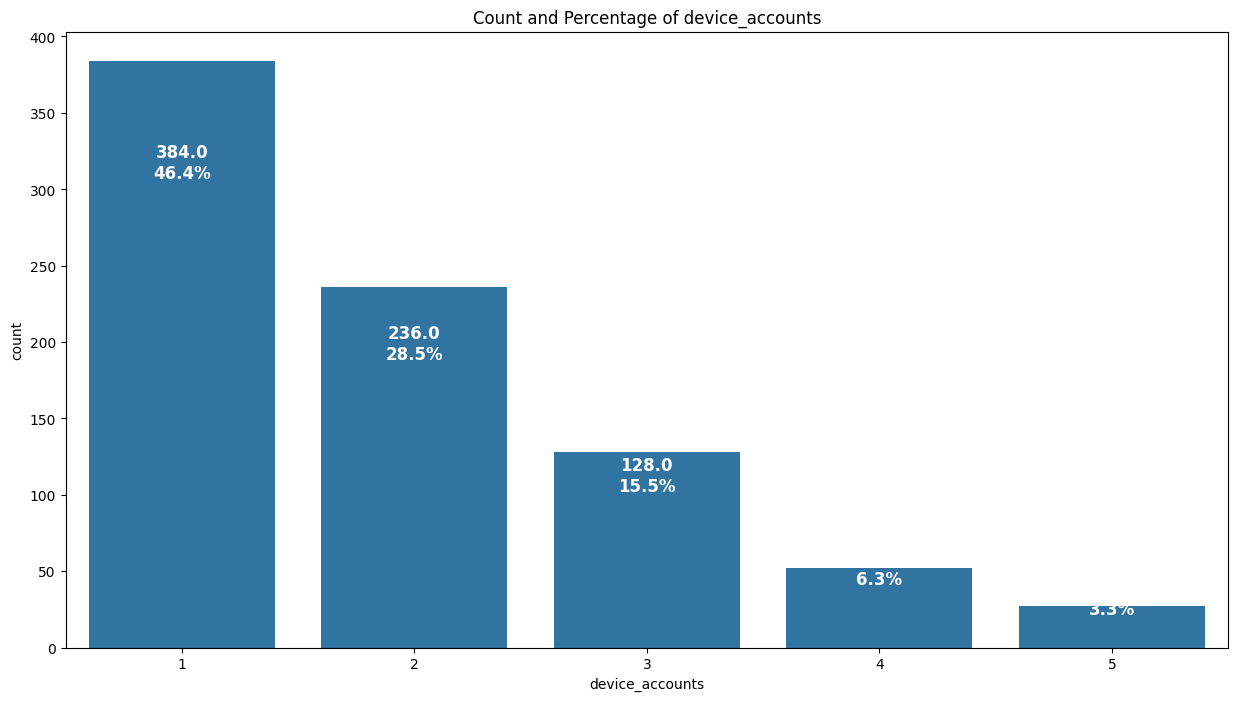

In [ ]:
#percentage
plt.figure(figsize=(15,8))
ax = sns.countplot(x='device_accounts', data=df)

total = len(df)

for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y - (y*0.2), f'{count}\n{percentage:.1f}%', ha='center', color='white', fontsize=12, fontweight='bold')

plt.title(f'Count and Percentage of {'device_accounts'}')
plt.show()

# Create a cross-tab

In [ ]:
cross_tab = pd.crosstab(df['device_accounts'], df['disabled_flag'], normalize='index') * 100
print(cross_tab)


disabled_flag           No        Yes
device_accounts                      
1                48.958333  51.041667
2                50.847458  49.152542
3                28.906250  71.093750
4                25.000000  75.000000
5                29.629630  70.370370


# Explore wallet top-up amount vs disabled_flag

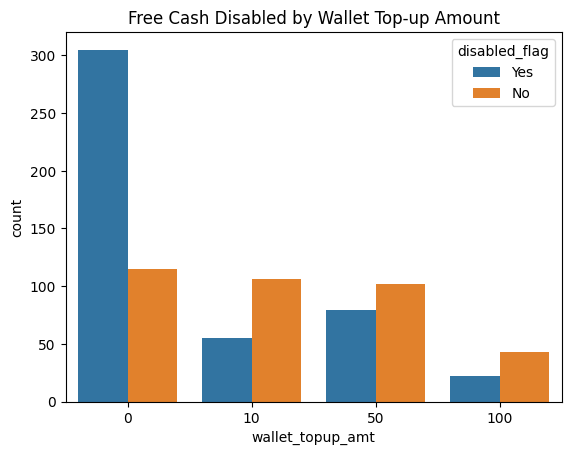

In [ ]:
sns.countplot(data=df, x='wallet_topup_amt', hue='disabled_flag')
plt.title('Free Cash Disabled by Wallet Top-up Amount')
plt.show()

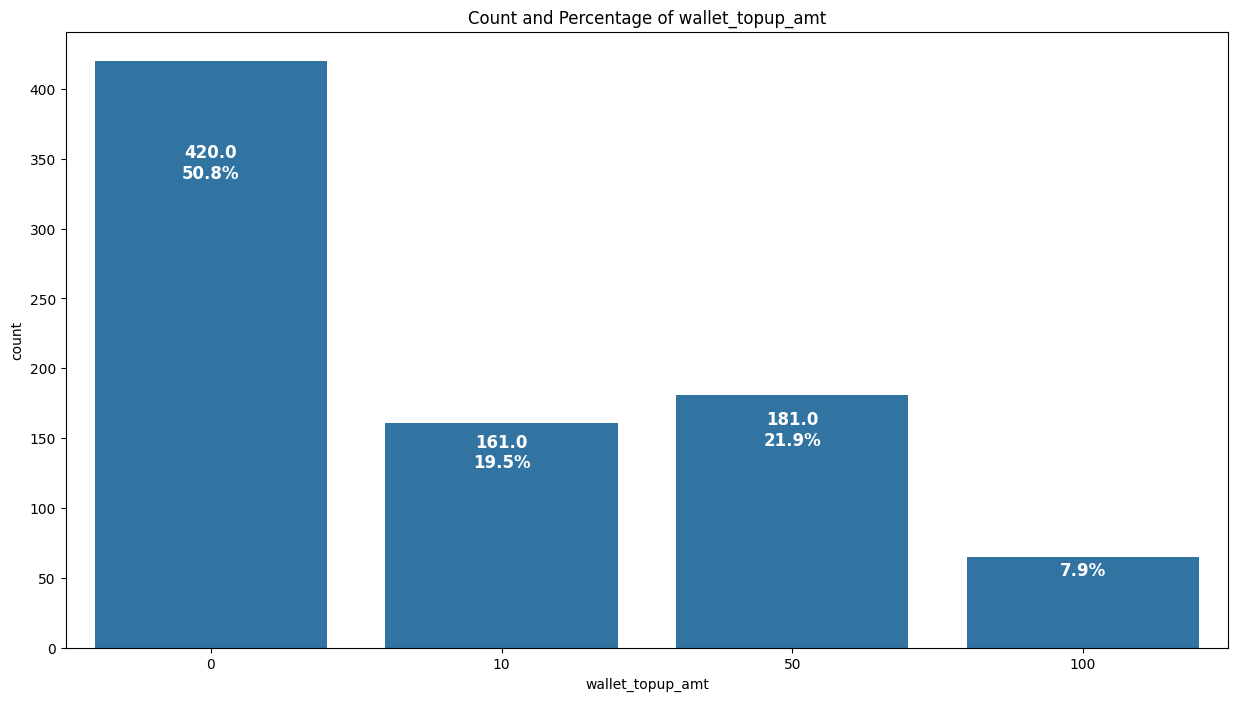

In [ ]:
#percentage
plt.figure(figsize=(15,8))
ax = sns.countplot(x='wallet_topup_amt', data=df)

total = len(df)

for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y - (y*0.2), f'{count}\n{percentage:.1f}%', ha='center', color='white', fontsize=12, fontweight='bold')

plt.title(f'Count and Percentage of {'wallet_topup_amt'}')
plt.show()

In [22]:
wallet_disable_rate = pd.crosstab(df['wallet_topup_amt'], df['disabled_flag'], normalize='index') * 100
print(wallet_disable_rate)


disabled_flag            No        Yes
wallet_topup_amt                      
0                 27.380952  72.619048
10                65.838509  34.161491
50                56.353591  43.646409
100               66.153846  33.846154


In [11]:
df['device_accounts'].value_counts()

device_accounts
1    384
2    236
3    128
4     52
5     27
Name: count, dtype: int64

# Analyze login hour distribution by disabled flag

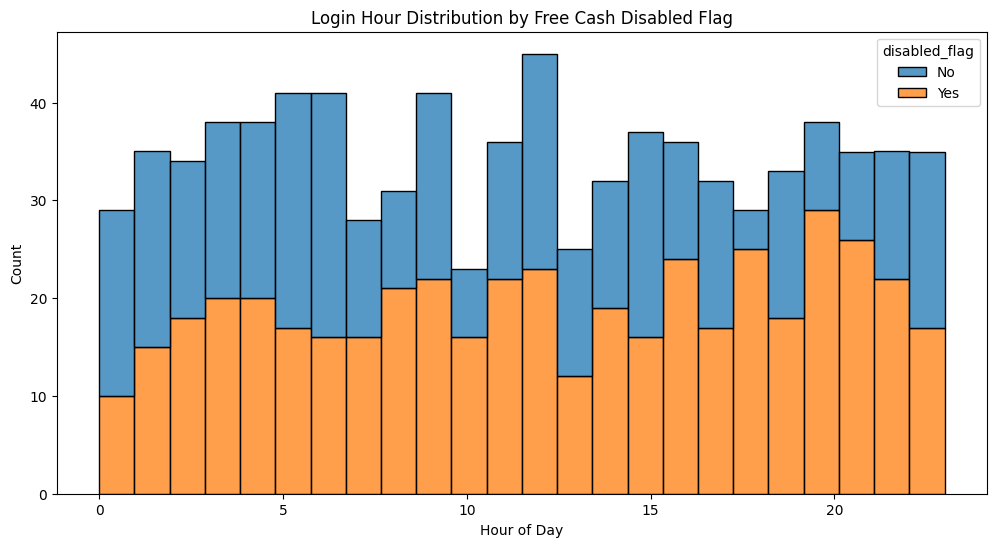

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='login_hour', hue='disabled_flag', bins=24, kde=False, multiple='stack')
plt.title('Login Hour Distribution by Free Cash Disabled Flag')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

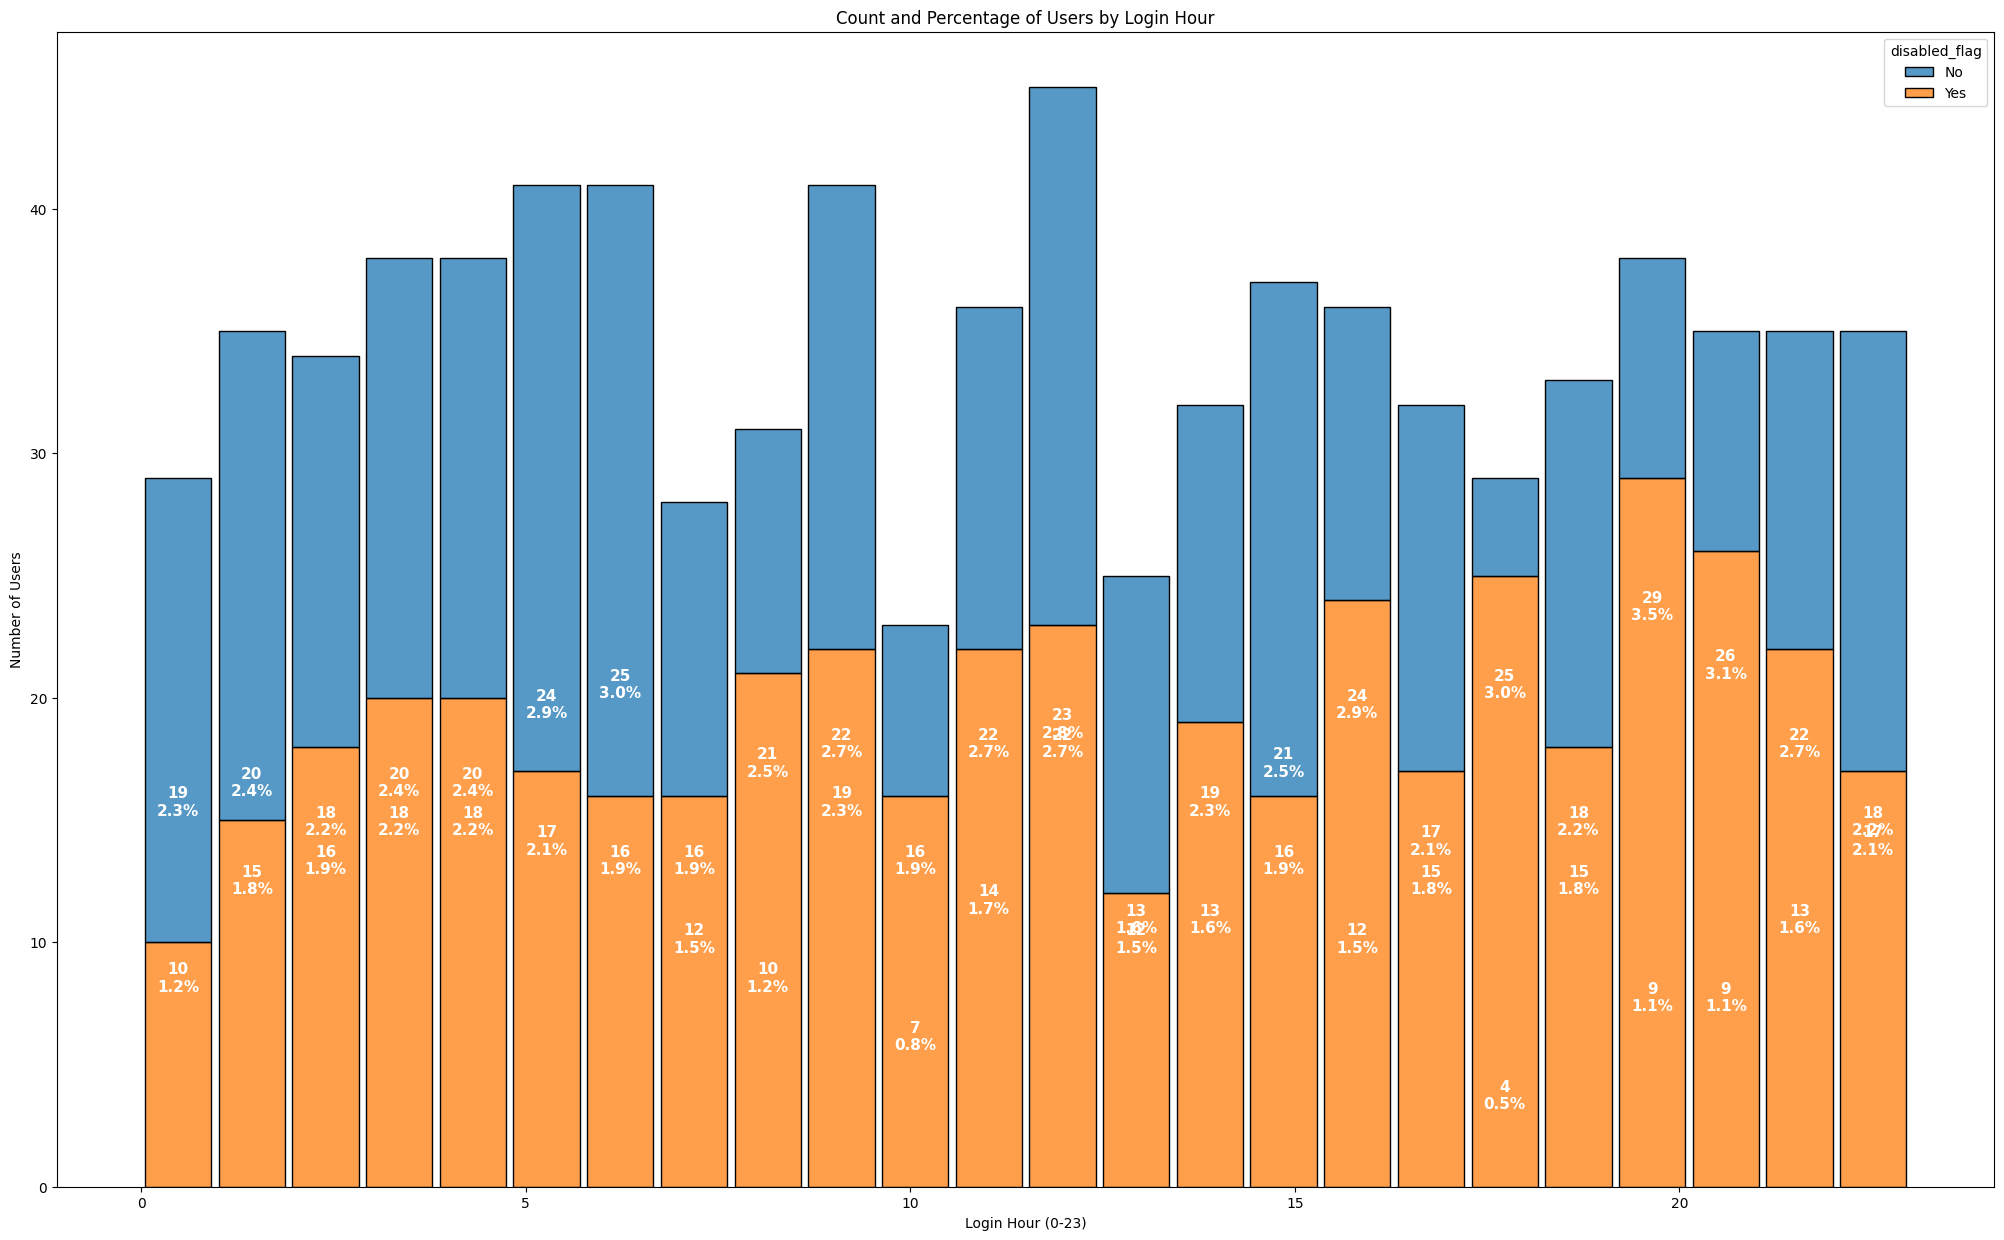

In [ ]:
# percentage
plt.figure(figsize=(25,15))
ax = sns.histplot(data=df, x='login_hour', hue='disabled_flag', bins=24, multiple='stack', shrink=0.9)

total = len(df)

# Add labels
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    if count > 0:
        ax.text(x, y - (y * 0.2), f'{int(count)}\n{percentage:.1f}%', ha='center',
                color='white', fontsize=11, fontweight='bold')

plt.title('Count and Percentage of Users by Login Hour')
plt.xlabel('Login Hour (0-23)')
plt.ylabel('Number of Users')
plt.show()

# Calculate % of users disabled and not disabled per login hour

In [ ]:
login_hour_rate = pd.crosstab(df['login_hour'], df['disabled_flag'], normalize='index') * 100

# Round for cleaner display
login_hour_rate = login_hour_rate.round(2)

# Print it as plain text
print("📊 Free Cash Disablement Rate by Login Hour (%):\n")
print(login_hour_rate)


📊 Free Cash Disablement Rate by Login Hour (%):

disabled_flag     No    Yes
login_hour                 
0              65.52  34.48
1              57.14  42.86
2              47.06  52.94
3              47.37  52.63
4              47.37  52.63
5              58.54  41.46
6              60.98  39.02
7              42.86  57.14
8              32.26  67.74
9              46.34  53.66
10             30.43  69.57
11             38.89  61.11
12             48.89  51.11
13             52.00  48.00
14             40.62  59.38
15             56.76  43.24
16             33.33  66.67
17             46.88  53.12
18             13.79  86.21
19             45.45  54.55
20             23.68  76.32
21             25.71  74.29
22             37.14  62.86
23             51.43  48.57


# Relationship between total_orders and disabled_flag (boxplot)

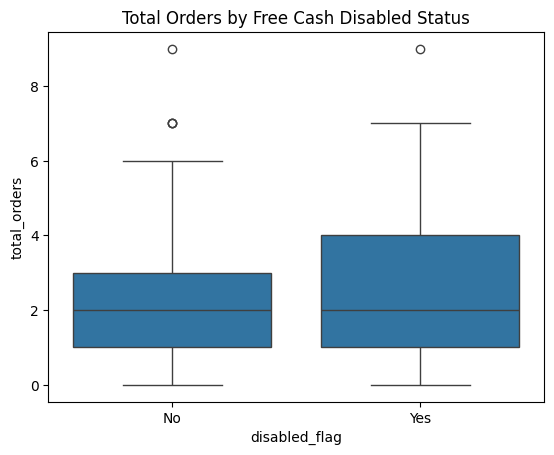

In [ ]:
sns.boxplot(data=df, x='disabled_flag', y='total_orders')
plt.title('Total Orders by Free Cash Disabled Status')
plt.show()

In [29]:
# Average total_orders for each group
order_stats = df.groupby('disabled_flag')['total_orders'].describe()
print(order_stats)


               count      mean       std  min  25%  50%  75%  max
disabled_flag                                                    
No             366.0  2.404372  1.587755  0.0  1.0  2.0  3.0  9.0
Yes            461.0  2.572668  1.656880  0.0  1.0  2.0  4.0  9.0


In [31]:
# Get the max safely
max_val = df['total_orders'].max()

# Ensure the last bin is greater than the max value
if max_val <= 10:
    bins = [0, 1, 3, 6, 10]
    labels = ['0–1', '2–3', '4–6', '7–10']
else:
    bins = [0, 1, 3, 6, 10, max_val + 1]
    labels = ['0–1', '2–3', '4–6', '7–10', '10+']

# Apply binning
df['order_range'] = pd.cut(df['total_orders'], bins=bins, labels=labels, right=False)

# Crosstab to calculate disablement rate by order group
order_rate = pd.crosstab(df['order_range'], df['disabled_flag'], normalize='index') * 100
order_rate = order_rate.round(2)

print("📊 Free Cash Disablement Rate by Total Order Range:\n")
print(order_rate)



📊 Free Cash Disablement Rate by Total Order Range:

disabled_flag     No    Yes
order_range                
0–1            48.53  51.47
2–3            46.05  53.95
4–6            43.36  56.64
7–10           27.50  72.50


# Correlation heatmap (numerical features only)

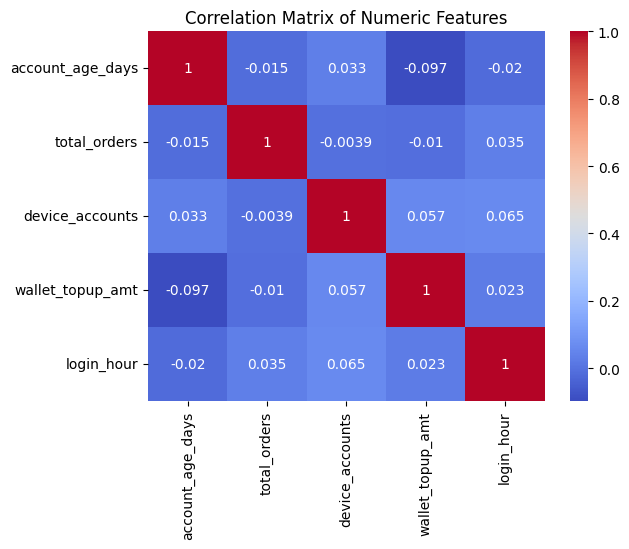

In [ ]:
num_df = df[['account_age_days', 'total_orders', 'device_accounts', 'wallet_topup_amt', 'login_hour']]
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## ✅ Conclusion

- Users with **3+ devices**, **no wallet top-up**, **evening logins (6–9 PM)**, and **many orders (7–10)** had the highest free cash disablement rates.
- These behaviors may signal fraud or misuse and should be monitored.
- While based on simulated data, these insights can guide fraud detection efforts.
